In [1]:
using CSV
using DataFrames
using StatsBase: mean
using Plots: heatmap

include("../src/SimPlot.jl")
using Main.SimPlot: get_value

Real[100, 0.05, 0.1, 0.01, 200, 10]


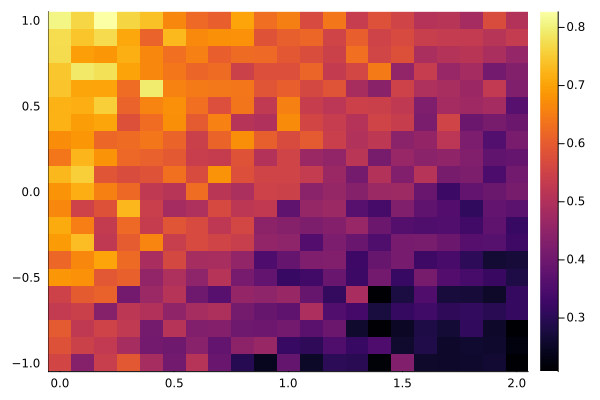

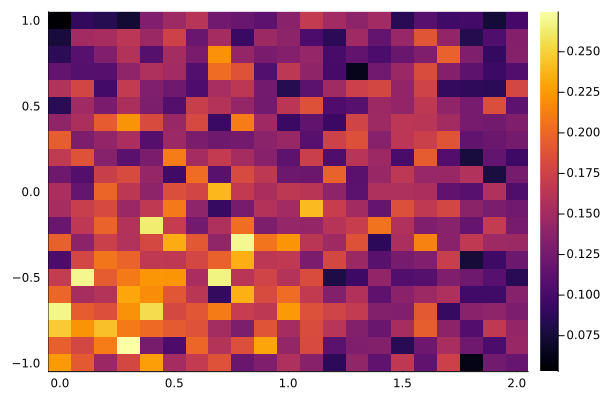

Real[100, 0.05, 0.5, 0.01, 200, 10]


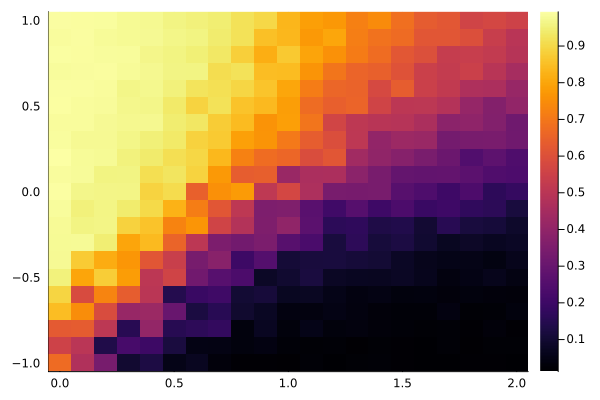

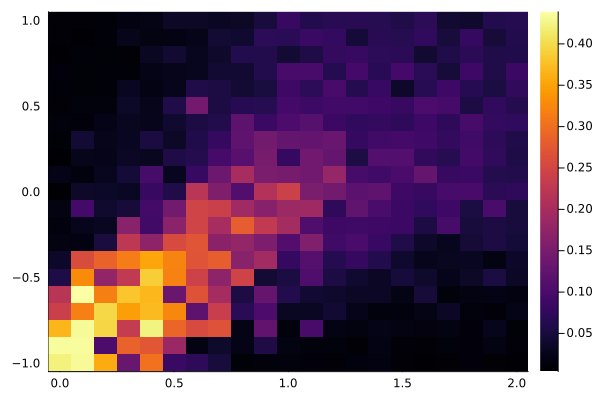

Real[100, 0.05, 1.0, 0.01, 200, 10]


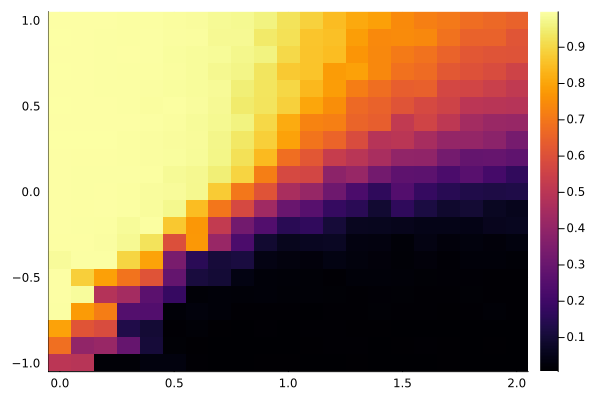

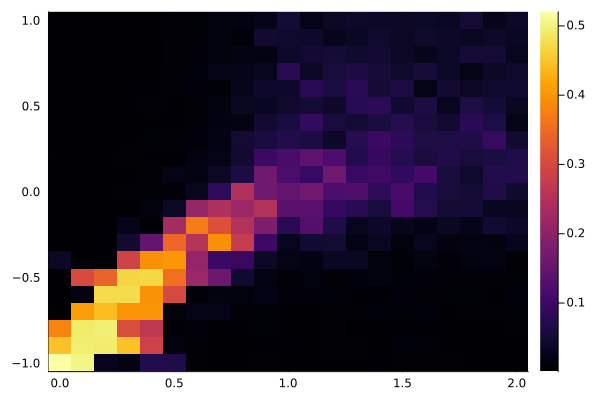

Real[200, 0.05, 0.1, 0.01, 400, 10]


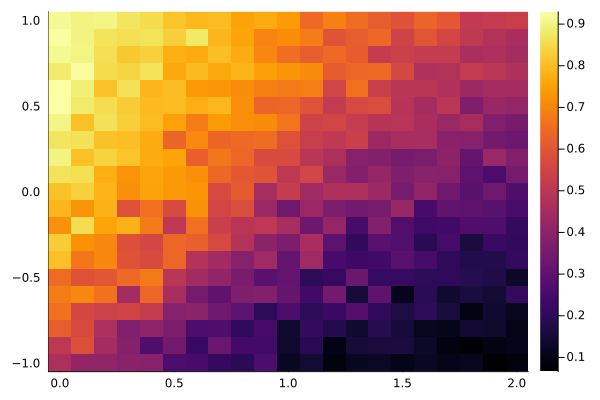

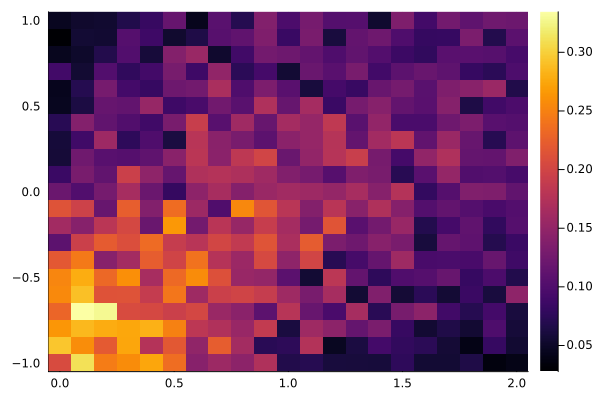

Real[200, 0.05, 0.5, 0.01, 400, 10]


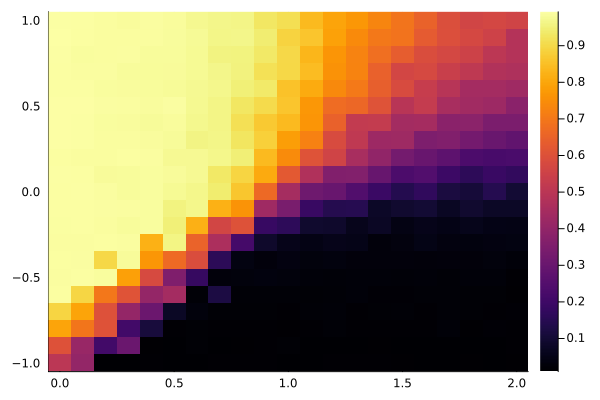

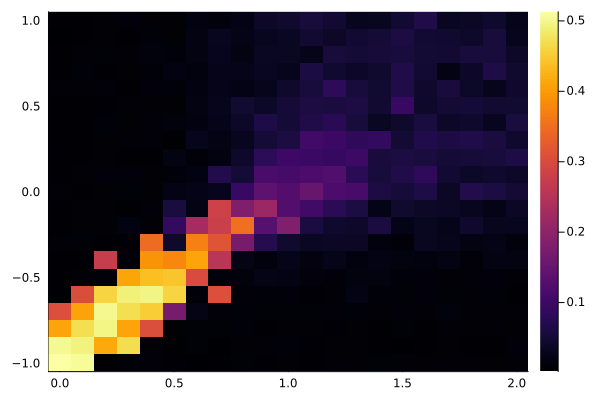

Real[200, 0.05, 1.0, 0.01, 400, 10]


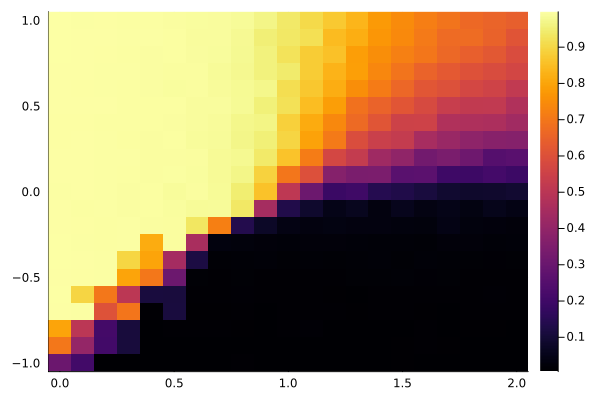

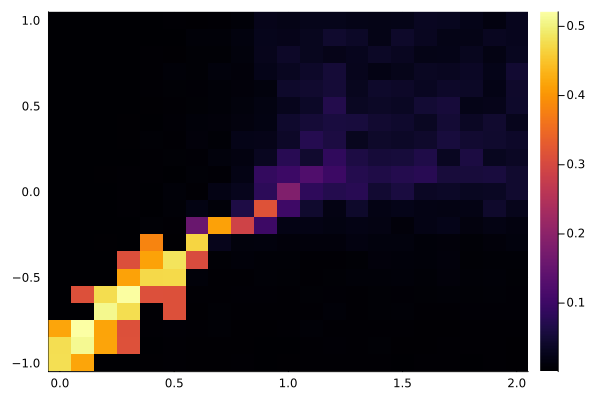

Real[400, 0.05, 0.1, 0.01, 800, 10]


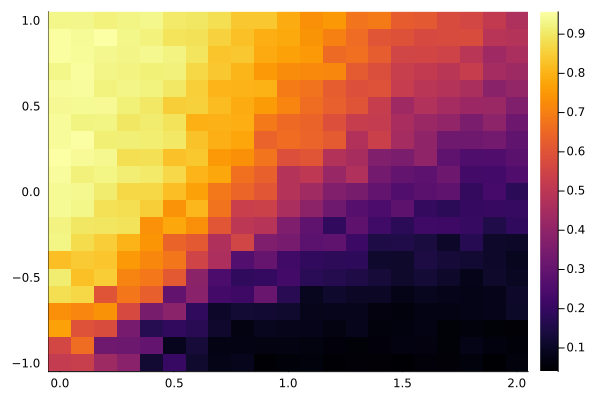

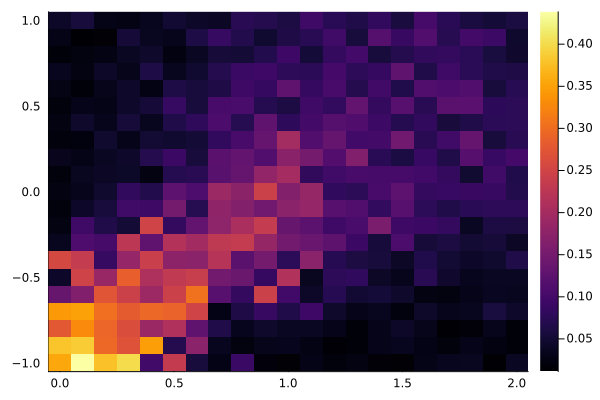

Real[400, 0.05, 0.5, 0.01, 800, 10]


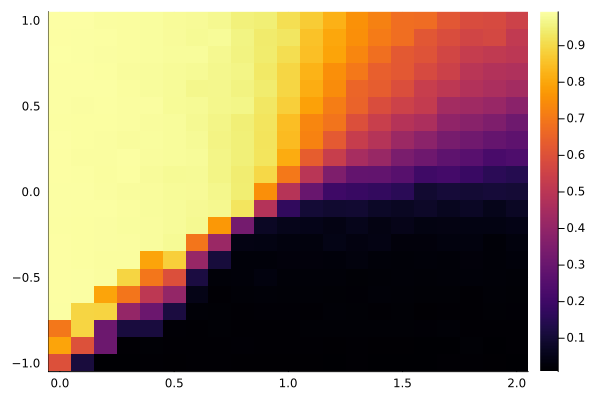

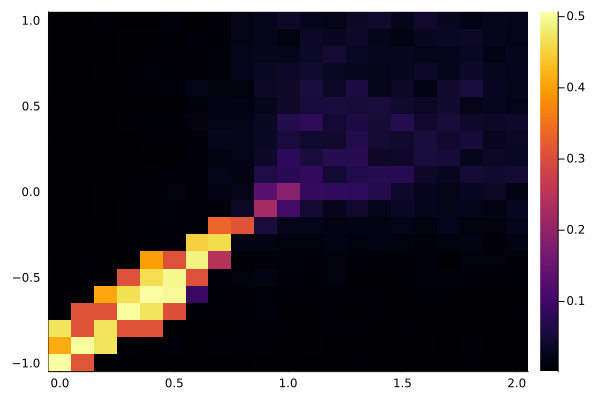

Real[400, 0.05, 1.0, 0.01, 800, 10]


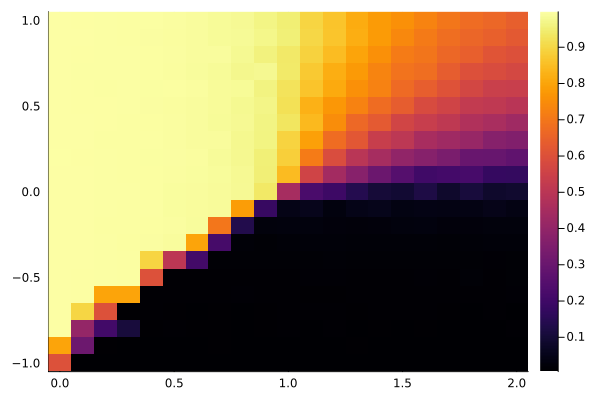

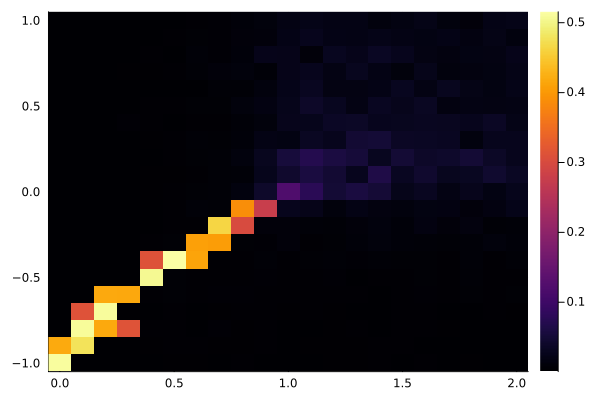

In [2]:
df = CSV.read("result.csv", DataFrame)

for partial_df in groupby(df, [:N, :reproduction_rate, :δ, :μ, :t_max, :trial_max])
    println(collect(partial_df[1, [:N, :reproduction_rate, :δ, :μ, :t_max, :trial_max]]))
    partial_df = partial_df[:, [:T, :S, :mean_cooperation, :std_cooperation]]

    T = sort(unique(partial_df.T))
    S = sort(unique(partial_df.S))
    mat = reshape([get_value(partial_df, t, s, :T, :S, :mean_cooperation) for s in S, t in T], length(S), length(T))
    display(heatmap(T, S, mat))
    mat = reshape([get_value(partial_df, t, s, :T, :S, :std_cooperation) for s in S, t in T], length(S), length(T))
    display(heatmap(T, S, mat))
end